In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/predict-energy-behavior-of-prosumers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-energy-behavior-of-prosumers/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv
/kaggle/input/predict-energy-behavior-of-prosumers/public_timeseries_testing_util.py
/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/county_id_to_name_map.json
/kaggle/input/predict-energy-behavior-of-prosumers/train.csv
/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/sample_submission.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/electricity

In [2]:
import matplotlib.pyplot as plt
import json

# Data Exploration

In this section I am simply exploring the data - making sense of the different data sets, finding patterns, viewing data types, etc.

In [3]:
path = '/kaggle/input/predict-energy-behavior-of-prosumers/'
for file in os.listdir(path):
    if os.path.isfile(path + file):
        if file.endswith("csv"):
            temp_df = pd.read_csv(path + file)
            print(file)
            print(temp_df.head())
            print("-"*100)
        else: print(f"{file} not a csv.\n","-"*100)

client.csv
   product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2  
----------------------------------------------------------------------------------------------------
gas_prices.csv
  forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 

In [4]:
train = pd.read_csv(path + 'train.csv')
client = pd.read_csv(path + 'client.csv')
gas = pd.read_csv(path + 'gas_prices.csv')
electric = pd.read_csv(path + 'electricity_prices.csv')
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [5]:
forecast = pd.read_csv(path + 'forecast_weather.csv')
forecast

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-30 02:00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424508,59.7,26.7,2023-05-30 02:00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424509,59.7,27.2,2023-05-30 02:00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424510,59.7,27.7,2023-05-30 02:00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0


In [6]:
with open(path + 'county_id_to_name_map.json') as f:
    data = json.load(f)
data

{'0': 'HARJUMAA',
 '1': 'HIIUMAA',
 '2': 'IDA-VIRUMAA',
 '3': 'JÄRVAMAA',
 '4': 'JÕGEVAMAA',
 '5': 'LÄÄNE-VIRUMAA',
 '6': 'LÄÄNEMAA',
 '7': 'PÄRNUMAA',
 '8': 'PÕLVAMAA',
 '9': 'RAPLAMAA',
 '10': 'SAAREMAA',
 '11': 'TARTUMAA',
 '12': 'UNKNOWN',
 '13': 'VALGAMAA',
 '14': 'VILJANDIMAA',
 '15': 'VÕRUMAA'}

In [7]:
# county, is_business, and product_type make up the unique identifiers (prediction unit)
c = 0
b = 0
p = 1

In [8]:
# Example to visualize what train.csv represents
example = train[
    (train['county']==c)
     & (train['is_business']==b)
    & (train['product_type']==p)
]
example['datetime'] = pd.to_datetime(example['datetime'])
example

/tmp/ipykernel_19/1748400296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['datetime'] = pd.to_datetime(example['datetime'])


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
122,0,0,1,1.132,0,2021-09-01 01:00:00,0,122,0
123,0,0,1,77.691,1,2021-09-01 01:00:00,0,123,0
244,0,0,1,0.490,0,2021-09-01 02:00:00,0,244,0
...,...,...,...,...,...,...,...,...,...
2017963,0,0,1,569.301,1,2023-05-31 21:00:00,637,2017963,0
2018092,0,0,1,5.086,0,2023-05-31 22:00:00,637,2018092,0
2018093,0,0,1,577.499,1,2023-05-31 22:00:00,637,2018093,0
2018222,0,0,1,2.921,0,2023-05-31 23:00:00,637,2018222,0


In [9]:
example.dtypes

county                         int64
is_business                    int64
product_type                   int64
target                       float64
is_consumption                 int64
datetime              datetime64[ns]
data_block_id                  int64
row_id                         int64
prediction_unit_id             int64
dtype: object

In [10]:
example_client = client[
    (client['county']==c)
     & (client['is_business']==b)
    & (client['product_type']==p)
]
example_client['date'] = pd.to_datetime(example_client['date'])
example_client

/tmp/ipykernel_19/743026702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_client['date'] = pd.to_datetime(example_client['date'])


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.890,0,2021-09-01,2
61,1,0,108,952.890,0,2021-09-02,3
122,1,0,108,952.890,0,2021-09-03,4
183,1,0,108,952.890,0,2021-09-04,5
244,1,0,108,952.890,0,2021-09-05,6
...,...,...,...,...,...,...,...
41591,1,0,508,4968.215,0,2023-05-25,633
41657,1,0,507,4960.215,0,2023-05-26,634
41723,1,0,507,4960.215,0,2023-05-27,635
41789,1,0,508,4964.215,0,2023-05-28,636


In [11]:
gas.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


Note: There is no breakdown for county, business, etc.

In [12]:
gas['forecast_date'] = pd.to_datetime(gas['forecast_date'])
gas['origin_date'] = pd.to_datetime(gas['origin_date'])
gas

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636


In [13]:
electric.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [14]:
electric['forecast_date'] = pd.to_datetime(electric['forecast_date'])
electric['origin_date'] = pd.to_datetime(electric['origin_date'])
electric

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [15]:
print("day:",example['datetime'][0].day)
print("month:",example['datetime'][0].month)
print("year:",example['datetime'][0].year)

day: 1
month: 9
year: 2021


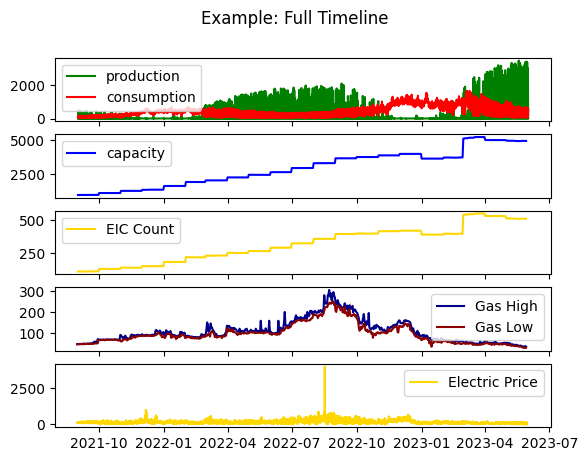

In [16]:
fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Example: Full Timeline")
# Subplot 1 : Target Values - Production / Consumption
production = example[(example['prediction_unit_id']==0) & (example['is_consumption']==0)]['target']
consumption = example[(example['prediction_unit_id']==0) & (example['is_consumption']==1)]['target']
time = example[(example['prediction_unit_id']==0) & (example['is_consumption']==0)]['datetime']
axs[0].plot(time, production, label = "production", c = "green")
axs[0].plot(time, consumption, label = "consumption", c = "red")
# Subplot 2 & 3: Client CSV - Installed Capacity / EIC Count
capacity = example_client['installed_capacity']
eic = example_client['eic_count']
client_date = example_client['date']
axs[1].plot(client_date, capacity, label = "capacity", c = "blue")
axs[2].plot(client_date, eic, label = "EIC Count", c = "gold")
# Subplot 4: gas_prices.csv - High and Low prices
gas_high = gas['highest_price_per_mwh']
gas_low = gas['lowest_price_per_mwh']
gas_date = gas['origin_date']
axs[3].plot(gas_date, gas_high, label = "Gas High", c = "darkblue")
axs[3].plot(gas_date, gas_low, label = "Gas Low", c = "darkred")
# Subplot 4: gas_prices.csv - High and Low prices
e_price = electric['euros_per_mwh']
e_date = electric['origin_date']
axs[4].plot(e_date, e_price, label = "Electric Price", c = "gold")
# Add legends
for ax in axs:
    ax.legend()

Take a closer look over just a year timeframe

In [17]:
year_example = example.loc[example.datetime.dt.year == 2021]
year_client = example_client.loc[example_client.date.dt.year == 2021]
year_gas = gas.loc[gas.origin_date.dt.year == 2021]
year_electric = electric.loc[electric.origin_date.dt.year == 2021]
year_example

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
122,0,0,1,1.132,0,2021-09-01 01:00:00,0,122,0
123,0,0,1,77.691,1,2021-09-01 01:00:00,0,123,0
244,0,0,1,0.490,0,2021-09-01 02:00:00,0,244,0
...,...,...,...,...,...,...,...,...,...
365671,0,0,1,395.083,1,2021-12-31 21:00:00,121,365671,0
365796,0,0,1,0.000,0,2021-12-31 22:00:00,121,365796,0
365797,0,0,1,374.278,1,2021-12-31 22:00:00,121,365797,0
365922,0,0,1,0.000,0,2021-12-31 23:00:00,121,365922,0


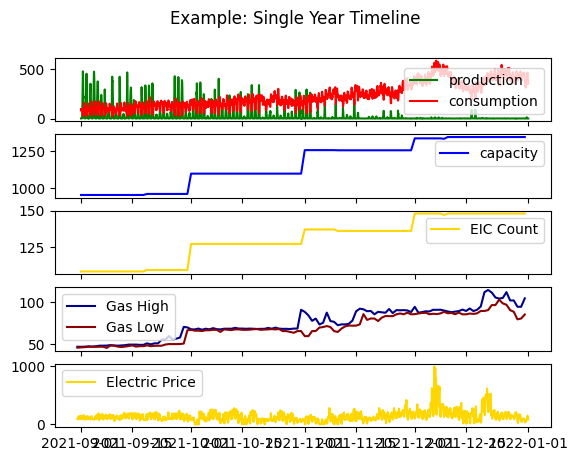

In [18]:
fig, axs = plt.subplots(5, sharex = True)
fig.suptitle("Example: Single Year Timeline")
# Subplot 1 : Target Values - Production / Consumption
production = year_example[(year_example['prediction_unit_id']==0) & (year_example['is_consumption']==0)]['target']
consumption = year_example[(year_example['prediction_unit_id']==0) & (year_example['is_consumption']==1)]['target']
time = year_example[(year_example['prediction_unit_id']==0) & (year_example['is_consumption']==0)]['datetime']
axs[0].plot(time, production, label = "production", c = "green")
axs[0].plot(time, consumption, label = "consumption", c = "red")
# Subplot 2 & 3: Client CSV - Installed Capacity / EIC Count
capacity = year_client['installed_capacity']
eic = year_client['eic_count']
client_date = year_client['date']
axs[1].plot(client_date, capacity, label = "capacity", c = "blue")
axs[2].plot(client_date, eic, label = "EIC Count", c = "gold")
# Subplot 4: gas_prices.csv - High and Low prices
gas_high = year_gas['highest_price_per_mwh']
gas_low = year_gas['lowest_price_per_mwh']
gas_date = year_gas['origin_date']
axs[3].plot(gas_date, gas_high, label = "Gas High", c = "darkblue")
axs[3].plot(gas_date, gas_low, label = "Gas Low", c = "darkred")
# Subplot 4: gas_prices.csv - High and Low prices
e_price = year_electric['euros_per_mwh']
e_date = year_electric['origin_date']
axs[4].plot(e_date, e_price, label = "Electric Price", c = "gold")
# Add legends
for ax in axs:
    ax.legend()